### **INIT**

In [ ]:
%%capture
!pip install q tensorflow==2.1
!pip install q keras==2.3.1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
import itertools
saved_output = []

def plot_gallery(images, titles, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[r], cmap=plt.cm.gray)
        plt.title(char_list_nameonly[titles[r]], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()
    #plt.savefig("predict.png")

def plot_gallery_norand(images, titles, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
#         r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(char_list_nameonly[titles[i]], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()

def plot_gallery_predict(images, predict, true, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[r], cmap=plt.cm.gray)
        plt.title('p:' + str(predict[r]) + '   t:' + str(true[r]), size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()
    #plt.savefig("predict.png")

In [ ]:
loc_collection = '/content/drive/My Drive/Notebook/Auto_Collection_Gray/'
shape = 'Square'
# shape = 'No_Margin'
char_list_nameonly = [
    'Alif‬', 'Bā’', 'Tā’', 'Ṡā’‬', 'Jīm', 'Ḥā’‬', 'Khā’‬',
    'Dāl‬', 'Żāl‬', 'Rā’‬', 'zai‬', 'sīn‬', 'syīn‬', 'ṣād',
    'ḍād', 'ṭā’‬', 'ẓȧ’‬', '‘ain', 'gain‬', 'fā’‬', 'qāf‬',
    'kāf‬', 'lām‬', 'mīm‬', 'nūn‬', 'wāw‬', 'hā’‬', 'yā’‬'
]
import pickle
filename = '/content/drive/My Drive/Notebook/sameratio_keepform.pkl'
sameratio_keepform = pickle.load(open(filename, 'rb'))
filename = '/content/drive/My Drive/Notebook/diffratio_keepform.pkl'
diffratio_keepform = pickle.load(open(filename, 'rb'))
filename = '/content/drive/My Drive/Notebook/sameratio_diffform.pkl'
sameratio_diffform = pickle.load(open(filename, 'rb'))
filename = '/content/drive/My Drive/Notebook/diffratio_diffform.pkl'
diffratio_diffform = pickle.load(open(filename, 'rb'))

print(sameratio_keepform.keys())
print(diffratio_keepform.keys())
print(sameratio_diffform.keys())
print(diffratio_diffform.keys())

dict_keys(['sk_32_bh', 'sk_32_bw', 'sk_sibh', 'sk_sibw', 'sk_largest'])
dict_keys(['dk_32', 'dk_sibh', 'dk_sibw', 'dk_libh', 'dk_libw'])
dict_keys(['sd_32', 'sd_smallest', 'sd_largest'])
dict_keys(['dd_32', 'dd_sibh', 'dd_sibw', 'dd_libh', 'dd_libw'])


In [ ]:
data_dk = []
label_dk = []
for i in range(0,28):
    for x in range(len(diffratio_keepform['dk_32'][i])):
        gd = diffratio_keepform['dk_32'][i][x]
        data_dk.append(diffratio_keepform['dk_32'][i][x])
        label_dk.append(i)
data_dk = np.array(data_dk)
label_dk = np.array(label_dk)

data_sk = []
data_sk_temp = []
label_sk = []
for i in range(0,28):
    for x in range(len(sameratio_keepform['sk_32_bh'][i])):
        data_sk_temp.append(sameratio_keepform['sk_32_bh'][i][x])
        label_sk.append(i)
for x in range(len(data_sk_temp)):
    h, w = data_sk_temp[x].shape
    if h and w > 32:
        img = cv2.resize(data_sk_temp[x], (32, 32))
        print(x)
    else:
        img = data_sk_temp[x]
    y = list(img.ravel())
    y = np.array(y)
    data_sk.append(y.reshape(32, 32))
data_sk = np.array(data_sk)
label_sk = np.array(label_sk)

data_sd = []
label_sd = []
for i in range(0,28):
    for x in range(len(sameratio_diffform['sd_largest'][i])):
        data_sd.append(sameratio_diffform['sd_largest'][i][x])
        label_sd.append(i)
data_sd = np.array(data_sd)
label_sd = np.array(label_sd)
data_sd_32 = []
for data in data_sd:
  data_sd_32.append(cv2.resize(data, (32,32)))
data_sd_32 = np.array(data_sd_32)
data_sd = data_sd_32

data_dd = []
label_dd = []
for i in range(0,28):
    for x in range(len(diffratio_diffform['dd_32'][i])):
        data_dd.append(diffratio_diffform['dd_32'][i][x])
        label_dd.append(i)
data_dd = np.array(data_dd)
label_dd = np.array(label_dd)

1311


sameratio_keepform


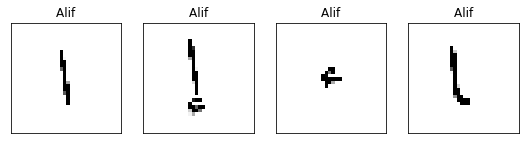

diffratio_keepform


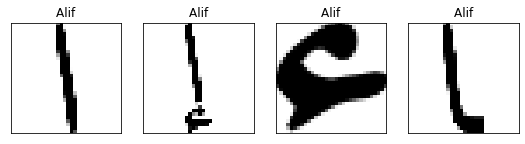

sameratio_diffform


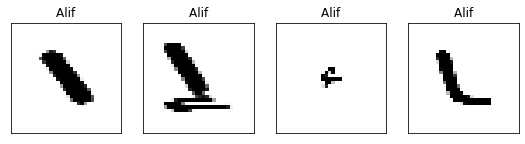

diffratio_diffform


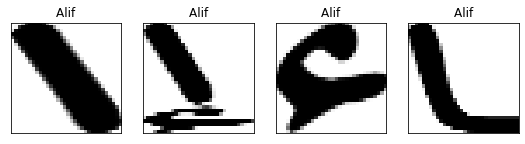

In [ ]:
print('sameratio_keepform')
plot_gallery_norand(data_sk, label_sk, 1, 4)
print('diffratio_keepform')
plot_gallery_norand(data_dk, label_dk, 1, 4)
print('sameratio_diffform')
plot_gallery_norand(data_sd, label_sd, 1, 4)
print('diffratio_diffform')
plot_gallery_norand(data_dd, label_dd, 1, 4)

### **Data**

(1452, 32, 32)
(1452,)


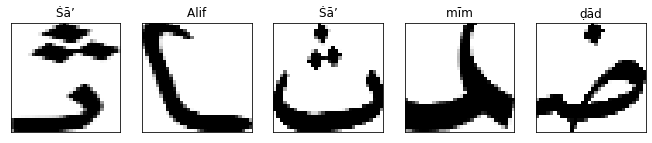

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42

dtype = 'DD'
data_train, data_test, y_train, y_test = train_test_split(
data_dd, label_dd, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [ ]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


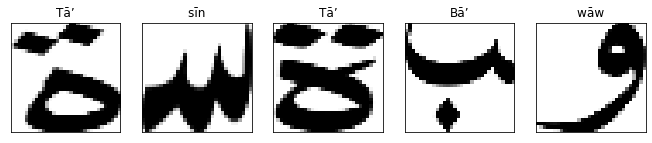

Testing Data 363


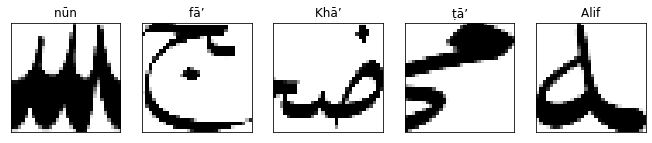

In [ ]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [ ]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

### **Model**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from keras.utils.np_utils import to_categorical
import keras
import keras.backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization, MaxPooling2D
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU, AveragePooling2D
import numpy
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time
import numpy as np

In [ ]:
def ElSawy(n_classes):
  model = Sequential()
  # C1
  model.add(Conv2D(filters = 80, 
                    kernel_regularizer='l2',
                    kernel_size = 5,
                    activation = 'relu', 
                    input_shape = (32,32,1)))
  # S2
  model.add(MaxPooling2D(pool_size = 2))
  # C3
  model.add(Conv2D(filters = 64,
                    kernel_regularizer='l2',
                    kernel_size = 5,
                    activation = 'relu' ))
  # S4
  model.add(MaxPooling2D(pool_size = 2))
  # FC 5
  model.add(Flatten())
  model.add(Dense(units = 1024, 
                  activation = 'relu',
                  kernel_regularizer='l2'))
  model.add(Dense(units = 28, activation = 'softmax'))

  # Compile model
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
%%time
n_classes = 28
ep = 100
bs = 64

K.clear_session()
model = ElSawy(n_classes)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 80)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 80)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        128064    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1639424   
_________________________________________________________________
dense_2 (Dense)              (None, 28)               

In [ ]:
%%time
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('ElSawy')
    filename = '/content/drive/My Drive/Notebook/Training_Files/ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/100
1161/1161 [==============================] - 0s 298us/step - loss: 11.8242 - accuracy: 0.0715 - val_loss: 7.2099 - val_accuracy: 0.1924
Epoch 2/100
1161/1161 [==============================] - 0s 106us/step - loss: 5.1303 - accuracy: 0.2868 - val_loss: 3.5588 - val_accuracy: 0.3608
Epoch 3/100
1161/1161 [==============================] - 0s 102us/step - loss: 2.7729 - accuracy: 0.5314 - val_loss: 2.5980 - val_accuracy: 0.5464
Epoch 4/100
1161/1161 [==============================] - 0s 100us/step - loss: 1.9695 - accuracy: 0.7028 - val_loss: 1.9434 - val_accuracy: 0.6873
Epoch 5/100
1161/1161 [==============================] - 0s 98us/step - loss: 1.5598 - accuracy: 0.7898 - val_loss: 1.7819 - val_accuracy: 0.7285
Epoch 6/100
1161/1161 [==============================] - 0s 111us/step - loss: 1.2903 - accuracy: 0.8519 - val_loss: 1.5545 - val_accuracy: 0.7629
Epoch 7/100
1161/1161 [==============================] - 0s 100u

### **Result**

k =  1


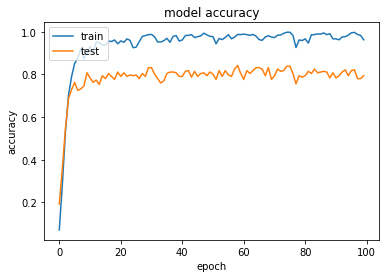

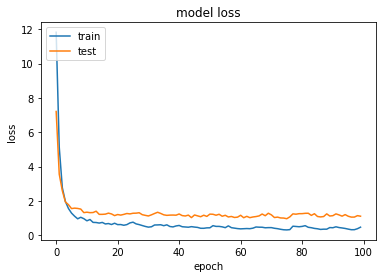

k =  2


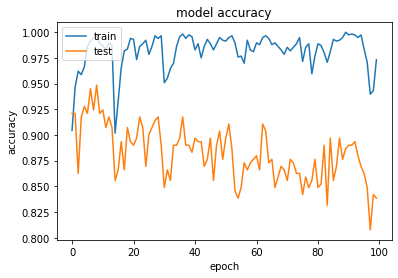

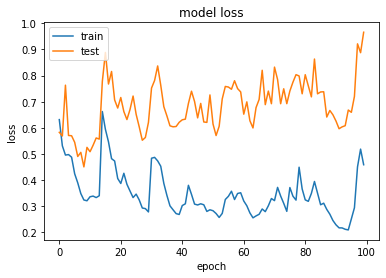

k =  3


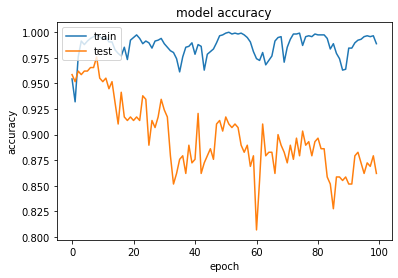

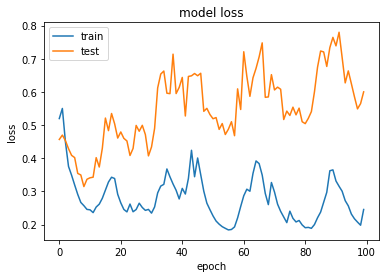

k =  4


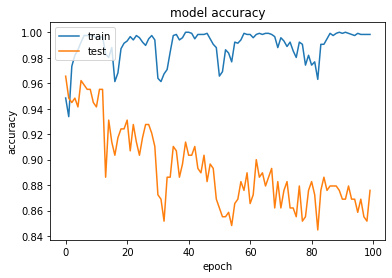

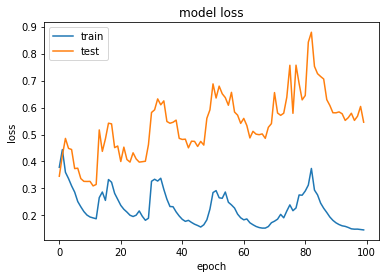

k =  5


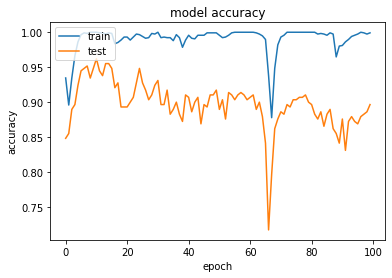

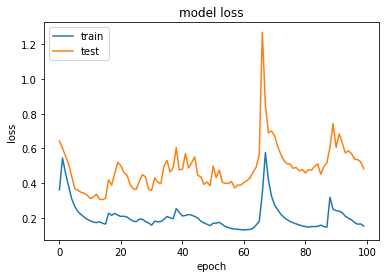

In [ ]:
# summarize history for accuracy
filename = '/content/drive/My Drive/Notebook/Training_Files/history_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.62      0.87      0.72        15
           2       0.81      0.88      0.85        25
           3       0.92      0.63      0.75        19
           4       0.94      0.74      0.83        23
           5       0.76      0.79      0.78        24
           6       0.73      0.76      0.74        21
           7       1.00      1.00      1.00         2
           8       0.67      1.00      0.80         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.64      0.88      0.74         8
          12       0.83      0.94      0.88        16
          13       0.79      1.00      0.88        11
          14       0.89      0.73      0.80        11
          15       1.00      1.00      1.00        11
          16       0.83      1.00      0.91         5
          17       0.80    

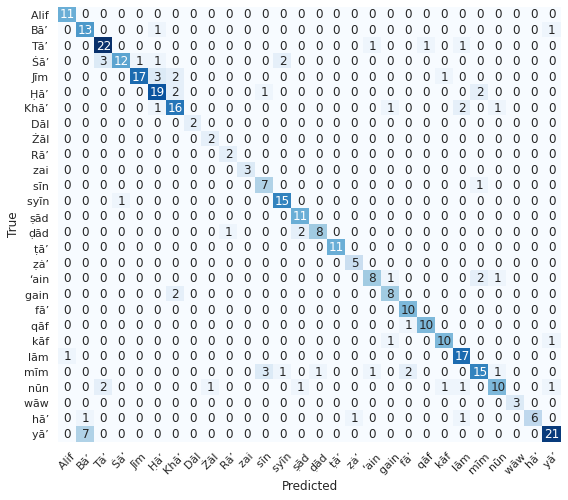

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)

### **Next DK**

In [ ]:
%reset_selective -f data_train
%reset_selective -f data_test
%reset_selective -f y_train
%reset_selective -f y_test
%reset_selective -f loaded_train
%reset_selective -f loaded_test
%reset_selective -f model
sns.reset_orig()

(1452, 32, 32)
(1452,)


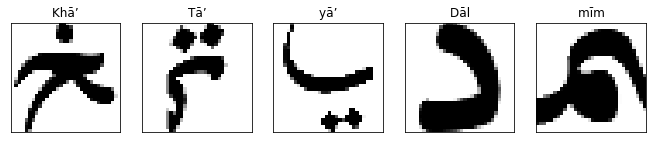

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42
dtype = 'DK'
data_train, data_test, y_train, y_test = train_test_split(
data_dk, label_dk, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [ ]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


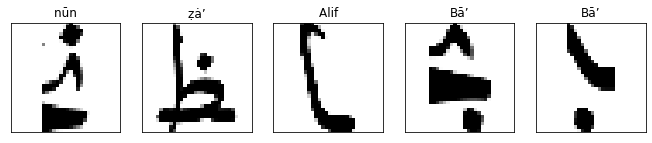

Testing Data 363


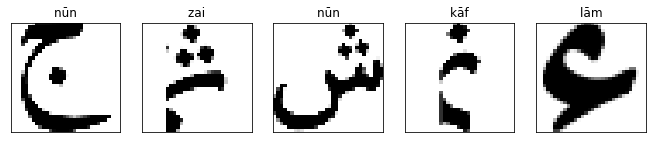

In [ ]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [ ]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

In [ ]:
%%time
K.clear_session()
model = ElSawy(n_classes)
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('ElSawy')
    filename = '/content/drive/My Drive/Notebook/Training_Files/ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/100
1161/1161 [==============================] - 0s 356us/step - loss: 11.5043 - accuracy: 0.0922 - val_loss: 6.8875 - val_accuracy: 0.2199
Epoch 2/100
1161/1161 [==============================] - 0s 104us/step - loss: 4.8583 - accuracy: 0.3049 - val_loss: 3.3591 - val_accuracy: 0.4261
Epoch 3/100
1161/1161 [==============================] - 0s 111us/step - loss: 2.7700 - accuracy: 0.4935 - val_loss: 2.4136 - val_accuracy: 0.5498
Epoch 4/100
1161/1161 [==============================] - 0s 101us/step - loss: 1.9715 - accuracy: 0.6693 - val_loss: 2.0740 - val_accuracy: 0.6426
Epoch 5/100
1161/1161 [==============================] - 0s 99us/step - loss: 1.5463 - accuracy: 0.7838 - val_loss: 1.7970 - val_accuracy: 0.6838
Epoch 6/100
1161/1161 [==============================] - 0s 98us/step - loss: 1.3293 - accuracy: 0.8183 - val_loss: 1.6086 - val_accuracy: 0.7491
Epoch 7/100
1161/1161 [==============================] - 0s 104us

k =  1


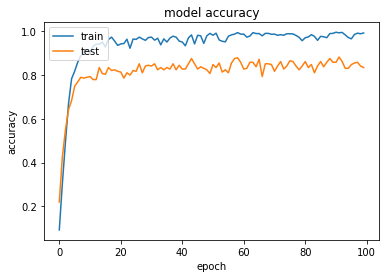

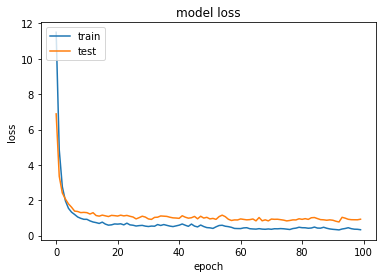

k =  2


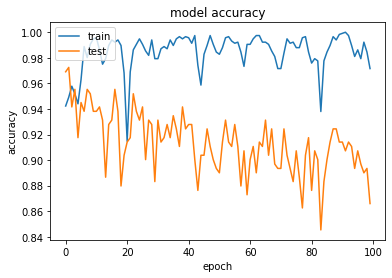

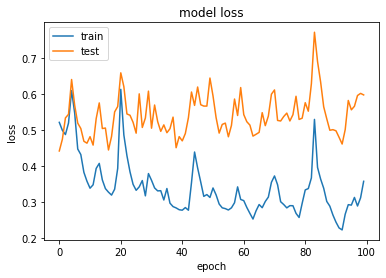

k =  3


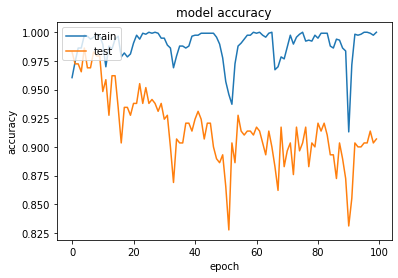

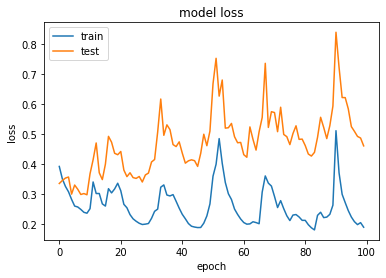

k =  4


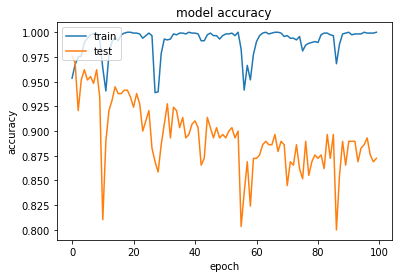

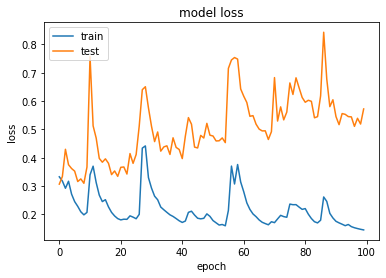

k =  5


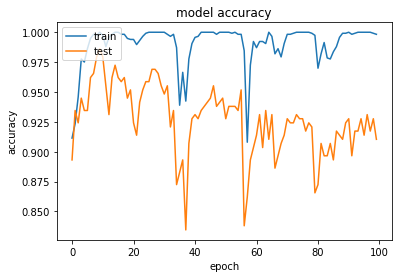

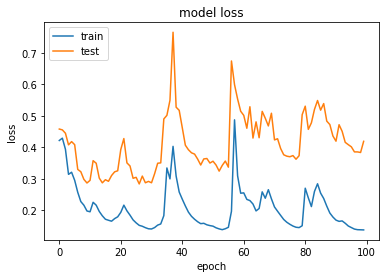

In [ ]:
# summarize history for accuracy
filename = '/content/drive/My Drive/Notebook/Training_Files/history_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.50      0.87      0.63        15
           2       0.92      0.92      0.92        25
           3       0.71      0.79      0.75        19
           4       0.73      0.83      0.78        23
           5       0.83      0.62      0.71        24
           6       0.61      0.81      0.69        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       0.75      1.00      0.86         3
          11       0.83      0.62      0.71         8
          12       1.00      0.81      0.90        16
          13       0.85      1.00      0.92        11
          14       0.75      0.82      0.78        11
          15       1.00      0.64      0.78        11
          16       0.83      1.00      0.91         5
          17       1.00    

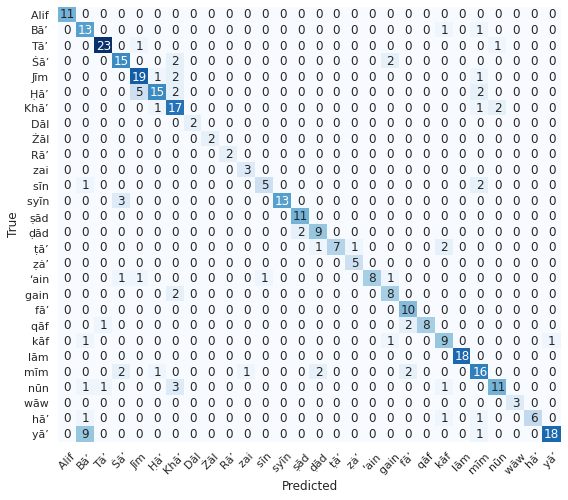

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)

### **Next SK**

In [ ]:
%reset_selective -f data_train
%reset_selective -f data_test
%reset_selective -f y_train
%reset_selective -f y_test
%reset_selective -f loaded_train
%reset_selective -f loaded_test
%reset_selective -f model
sns.reset_orig()

(1452, 32, 32)
(1452,)


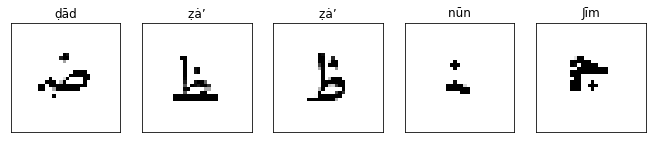

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42
dtype = 'SK'
data_train, data_test, y_train, y_test = train_test_split(
data_sk, label_sk, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [ ]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


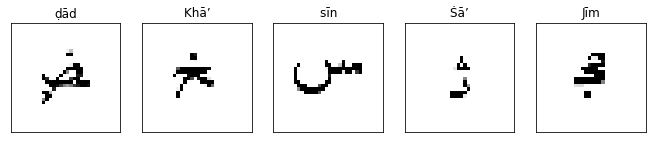

Testing Data 363


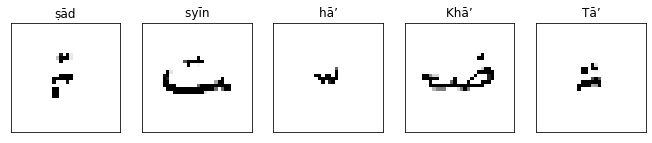

In [ ]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [ ]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

In [ ]:
%%time
K.clear_session() 
model = ElSawy(n_classes)
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('ElSawy')
    filename = '/content/drive/My Drive/Notebook/Training_Files/ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/100
1161/1161 [==============================] - 0s 291us/step - loss: 11.4491 - accuracy: 0.0629 - val_loss: 6.9762 - val_accuracy: 0.0619
Epoch 2/100
1161/1161 [==============================] - 0s 106us/step - loss: 5.2506 - accuracy: 0.1189 - val_loss: 3.7599 - val_accuracy: 0.1959
Epoch 3/100
1161/1161 [==============================] - 0s 103us/step - loss: 3.1794 - accuracy: 0.2584 - val_loss: 2.6680 - val_accuracy: 0.3471
Epoch 4/100
1161/1161 [==============================] - 0s 109us/step - loss: 2.4964 - accuracy: 0.3661 - val_loss: 2.4678 - val_accuracy: 0.3849
Epoch 5/100
1161/1161 [==============================] - 0s 119us/step - loss: 2.3369 - accuracy: 0.4057 - val_loss: 2.2104 - val_accuracy: 0.4227
Epoch 6/100
1161/1161 [==============================] - 0s 109us/step - loss: 2.0448 - accuracy: 0.4996 - val_loss: 2.1389 - val_accuracy: 0.4639
Epoch 7/100
1161/1161 [==============================] - 0s 106

k =  1


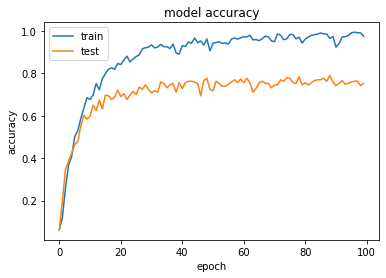

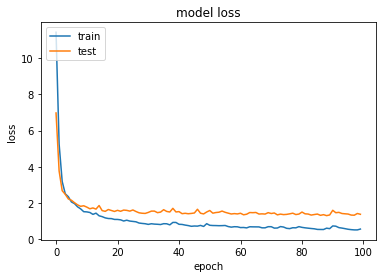

k =  2


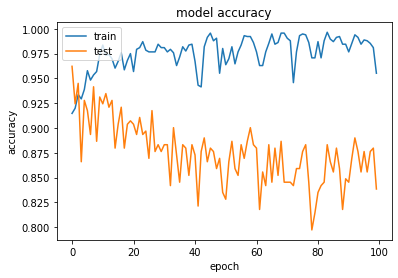

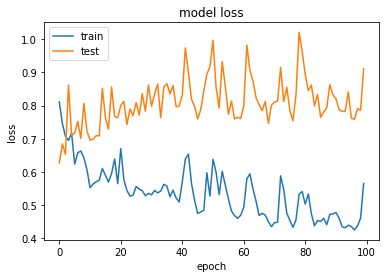

k =  3


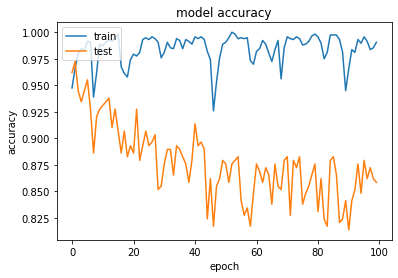

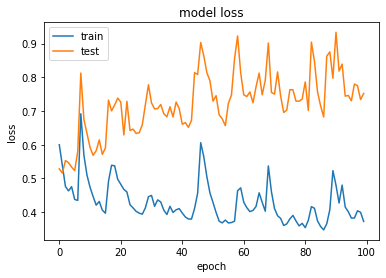

k =  4


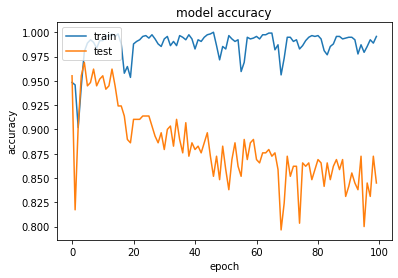

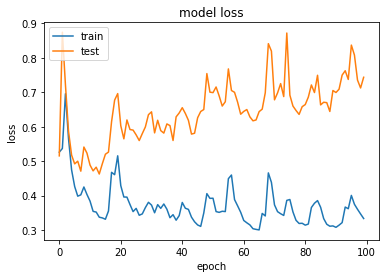

k =  5


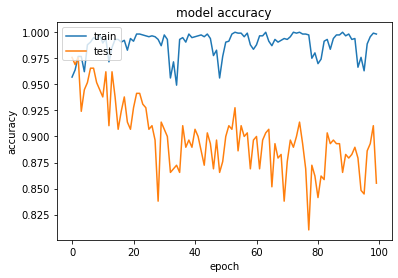

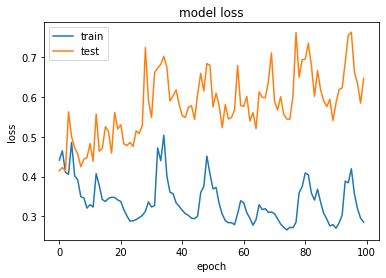

In [ ]:
# summarize history for accuracy
filename = '/content/drive/My Drive/Notebook/Training_Files/history_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.72      0.87      0.79        15
           2       0.77      0.92      0.84        25
           3       0.71      0.79      0.75        19
           4       0.94      0.70      0.80        23
           5       0.75      0.75      0.75        24
           6       0.73      0.52      0.61        21
           7       1.00      0.50      0.67         2
           8       0.67      1.00      0.80         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         8
          12       1.00      0.81      0.90        16
          13       0.92      1.00      0.96        11
          14       0.75      0.82      0.78        11
          15       1.00      0.73      0.84        11
          16       0.80      0.80      0.80         5
          17       0.60    

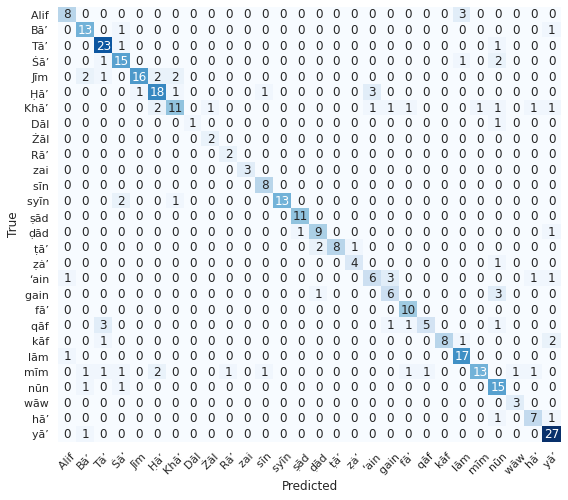

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)

### **Next SD**

In [ ]:
%reset_selective -f data_train
%reset_selective -f data_test
%reset_selective -f y_train
%reset_selective -f y_test
%reset_selective -f loaded_train
%reset_selective -f loaded_test
%reset_selective -f model
sns.reset_orig()

(1452, 32, 32)
(1452,)


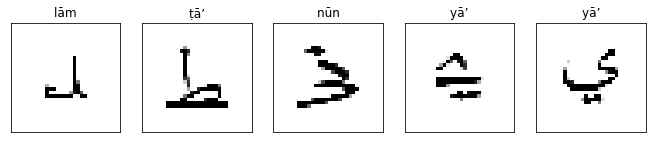

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42
dtype = 'SD'
data_train, data_test, y_train, y_test = train_test_split(
data_sd, label_sd, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [ ]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


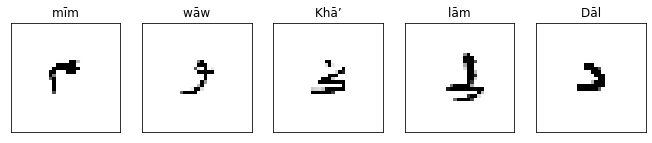

Testing Data 363


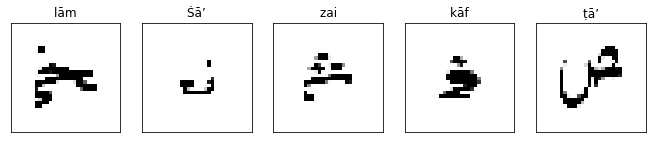

In [ ]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [ ]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

In [ ]:
%%time
K.clear_session() 
model = ElSawy(n_classes)
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('ElSawy')
    filename = '/content/drive/My Drive/Notebook/Training_Files/ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/100
1161/1161 [==============================] - 0s 305us/step - loss: 11.6922 - accuracy: 0.0612 - val_loss: 7.2660 - val_accuracy: 0.1134
Epoch 2/100
1161/1161 [==============================] - 0s 111us/step - loss: 5.4383 - accuracy: 0.1283 - val_loss: 3.9050 - val_accuracy: 0.2131
Epoch 3/100
1161/1161 [==============================] - 0s 106us/step - loss: 3.3233 - accuracy: 0.2326 - val_loss: 2.9298 - val_accuracy: 0.2509
Epoch 4/100
1161/1161 [==============================] - 0s 112us/step - loss: 2.6731 - accuracy: 0.3170 - val_loss: 2.5849 - val_accuracy: 0.3505
Epoch 5/100
1161/1161 [==============================] - 0s 113us/step - loss: 2.3158 - accuracy: 0.4289 - val_loss: 2.2953 - val_accuracy: 0.4502
Epoch 6/100
1161/1161 [==============================] - 0s 116us/step - loss: 2.0340 - accuracy: 0.5271 - val_loss: 2.1861 - val_accuracy: 0.5120
Epoch 7/100
1161/1161 [==============================] - 0s 103

k =  1


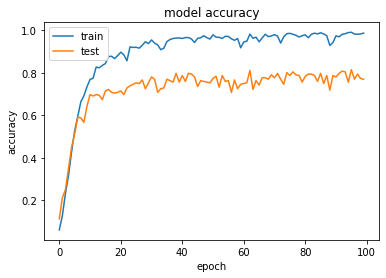

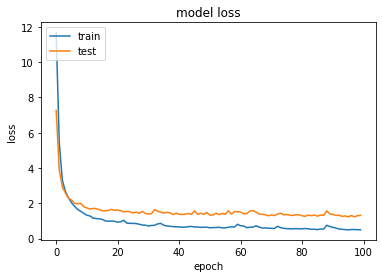

k =  2


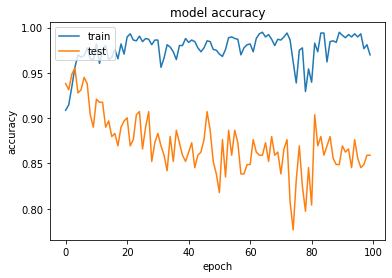

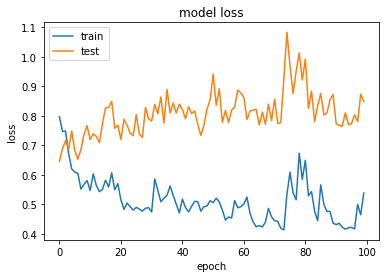

k =  3


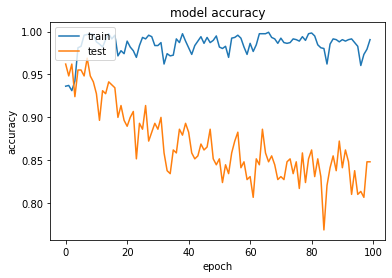

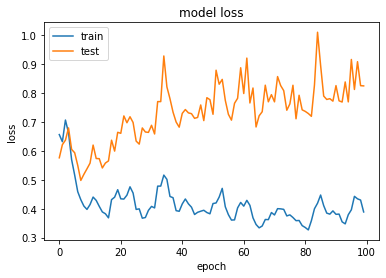

k =  4


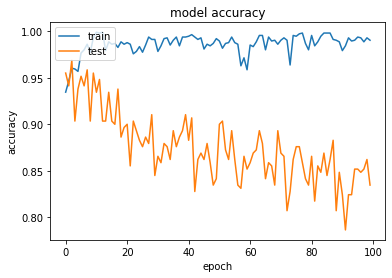

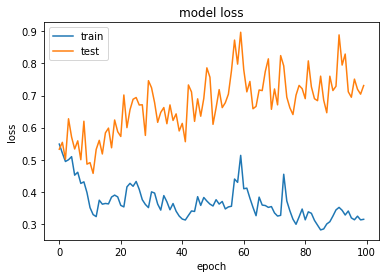

k =  5


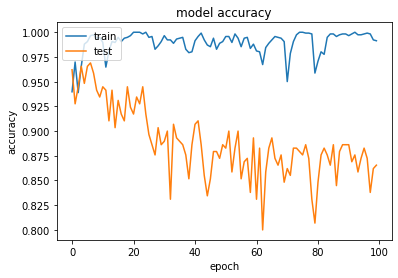

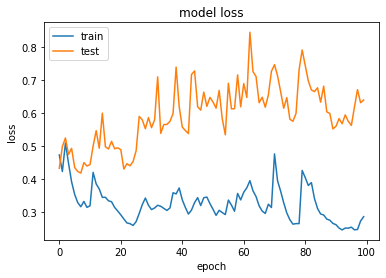

In [ ]:
# summarize history for accuracy
sns.reset_orig()
filename = '/content/drive/My Drive/Notebook/Training_Files/history_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.71      0.80      0.75        15
           2       0.65      0.96      0.77        25
           3       0.75      0.63      0.69        19
           4       0.82      0.61      0.70        23
           5       0.62      0.67      0.64        24
           6       0.76      0.76      0.76        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.57      1.00      0.73         8
          12       0.88      0.94      0.91        16
          13       0.85      1.00      0.92        11
          14       0.67      0.73      0.70        11
          15       1.00      0.73      0.84        11
          16       1.00      1.00      1.00         5
          17       0.58    

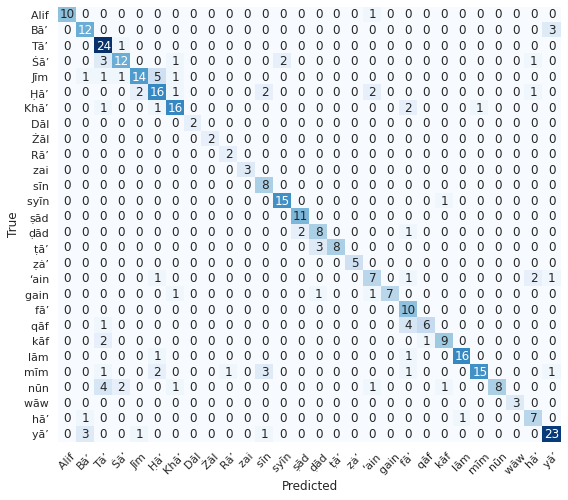

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_ElSawy_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)